**Plan**

**1. Introduction**<br>
**2. Linear Models**<br>
**3. Support Vector Machines**<br>
**4. Nearest Neighbors**<br>
**5. Decision Trees**<br>
**6. Ensemble Methods**<br>
**7. Guassian Processes**<br>
**8. Naive Bayes**<br>
**9. Discriminant Analysis**<br>


# **Introduction**

**Supervised Learning** is a type of machine learning where an algorithm is trained on a labeled dataset, meaning each training example is paired with an output label. The goal is to learn a mapping from inputs to outputs, enabling the model to predict the label for new, unseen data.

Key characteristics:
- **Input-Output Pairs**: Training data consists of input-output pairs, with inputs being the features and outputs being the labels.
- **Training Process**: The model learns by minimizing the difference between its predictions and the actual labels through a process called training.
- **Common Algorithms**: Includes methods such as Linear Regression, Logistic Regression, Support Vector Machines (SVM), Decision Trees, and Neural Networks.

Applications:
- **Classification**: Assigning labels to input data, e.g., email spam detection, image recognition.
- **Regression**: Predicting continuous values, e.g., house price prediction, stock market forecasting.

Supervised learning is foundational in machine learning, providing accurate predictions in a wide range of applications by leveraging labeled data for training.

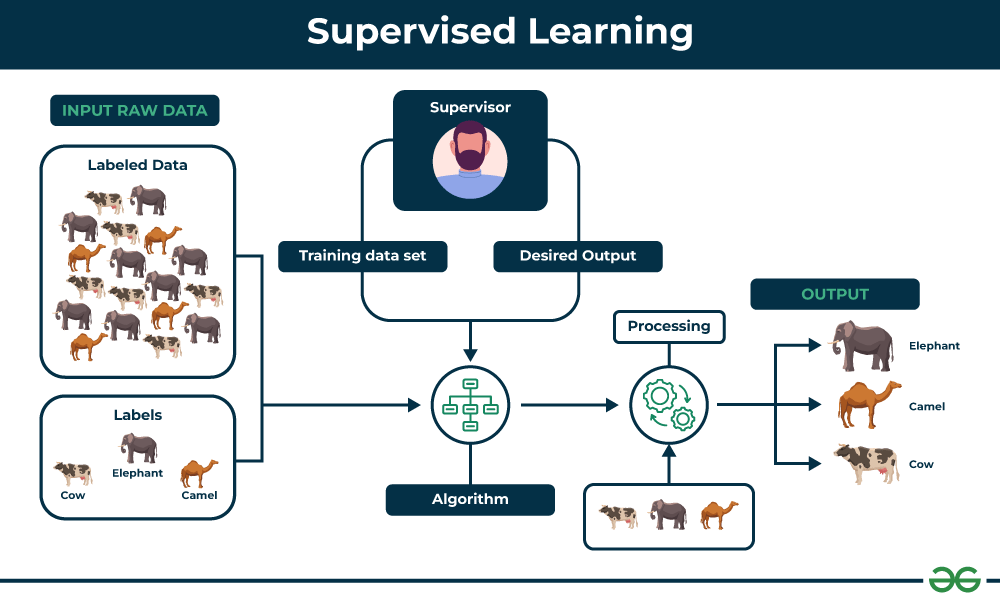

# **Linear Models**

**Linear Models** are a class of machine learning models that assume a linear relationship between the input features and the output. They predict the output as a weighted sum of the input features plus a bias term. The general form of a linear model is:

$$ y = \mathbf{w} \cdot \mathbf{x} + b $$

where $ \mathbf{x} $ represents the input features, $ \mathbf{w} $ represents the weights, and $ b $ is the bias.<br><br><br>

## **Linear Regression**

**Linear Regression** is a supervised learning algorithm used for predicting a continuous output variable based on one or more input features. It models the relationship between the dependent variable $ y $ and the independent variables $ \mathbf{x} $ by fitting a linear equation to the observed data.

**Algorithm (Mathematics)**

The model predicts $ y $ using the equation:
$$ y = \mathbf{w} \cdot \mathbf{x} + b $$

where:
- $ \mathbf{w} $ is the vector of weights,
- $\mathbf{x}$ is the vector of input features,
- $b$ is the bias term.

The goal is to minimize the Mean Squared Error (MSE) between the predicted and actual values:
$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
where $ y_i $ is the actual value and $ \hat{y}_i $ is the predicted value.


**Use Cases**

Linear regression is useful when:
- The relationship between the input features and the output is approximately linear.
- Interpretability of the model is important.
- Fast and scalable solutions are needed for regression problems.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
boston = load_boston()
X = boston.data
y = boston.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

**R² Score Formula**

The R² score, also known as the coefficient of determination, is a statistical measure that indicates how well the regression predictions approximate the real data points. The formula for the R² score is:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

where:
- $ y_i $ are the actual values.
- $ \hat{y}_i $ are the predicted values.
- $ \bar{y} $ is the mean of the actual values.
- $ n $ is the number of data points.

The R² score ranges from 0 to 1:
- An R² score of 1 indicates perfect predictions.
- An R² score of 0 indicates that the model does not explain any of the variability of the response data around its mean.

In Python, you can calculate the R² score using Scikit-Learn's `r2_score` function, as shown in the previous example.

## **Logistic Regression**


**Definition**

Logistic Regression is a statistical method for analyzing datasets in which there are one or more independent variables that determine an outcome. The outcome is usually binary (0 or 1, true or false, yes or no). Unlike linear regression, which outputs continuous numbers, logistic regression outputs probabilities that can be mapped to two classes.



**Use Case**

Logistic Regression is widely used for binary classification problems. Some common use cases include:
- **Spam Detection:** Classifying emails as spam or not spam.
- **Medical Diagnosis:** Predicting the presence or absence of a disease.
- **Credit Scoring:** Determining whether a loan applicant is a good or bad credit risk.
- **Marketing:** Predicting whether a user will click on an ad or not.


**Algorithm (Mathematical Details)**

1. **Model Representation:**
   Logistic Regression uses the logistic function (also called the sigmoid function) to model the probability of the default class (usually class 1).

   $$ h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}} $$

   Here, $h_\theta(x)$ is the hypothesis, $\theta$ is the parameter vector, and $x$ is the input feature vector.

2. **Cost Function:**
   The cost function used in Logistic Regression is the Log Loss (Logistic Loss) function.

   $$ J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right] $$

   Here, $m$ is the number of training examples, $y^{(i)}$ is the actual label of the $i^{th}$ training example, and $h_\theta(x^{(i)})$ is the predicted probability for the $i^{th}$ training example.

3. **Gradient Descent:**
   To minimize the cost function $J(\theta)$, we use gradient descent.

   $$ \theta := \theta - \alpha \nabla_\theta J(\theta) $$

   The gradient of the cost function with respect to $\theta$ is given by:

   $$ \nabla_\theta J(\theta) = \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right) x^{(i)} $$

   Here, $\alpha$ is the learning rate.

4. **Decision Boundary:**
   The decision boundary for Logistic Regression is where the probability $h_\theta(x)$ is 0.5. For binary classification, this is given by:

   $$ \theta^T x = 0 $$


In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Step 3: Prepare the data
# We'll use only two classes for binary classification (class 0 and class 1)
# and two features for simplicity (sepal length and sepal width)
X = X[y != 2, :2]
y = y[y != 2]

# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Step 7: Make predictions
sample = np.array([[5.0, 3.6]])  # Sample data point
prediction = model.predict(sample)
print(f'Predicted class for sample {sample}: {prediction}')

# Visualize the decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Logistic Regression Decision Boundary')
    plt.show()

plot_decision_boundary(model, X, y)


1. **Accuracy:**
   Accuracy measures the proportion of correctly predicted instances among all instances.

   $$ \text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}} = \frac{TP + TN}{TP + TN + FP + FN} $$

   where:
   - $ TP $ = True Positives
   - $ TN $ = True Negatives
   - $ FP $ = False Positives
   - $ FN $ = False Negatives

2. **Precision:**
   Precision measures the proportion of true positive predictions among all positive predictions made.

   $$ \text{Precision} = \frac{TP}{TP + FP} $$

3. **Recall (Sensitivity or True Positive Rate):**
   Recall measures the proportion of true positive instances that are correctly predicted.

   $$ \text{Recall} = \frac{TP}{TP + FN} $$

4. **F1 Score:**
   F1 score is the harmonic mean of precision and recall, providing a single score that balances both metrics.

   $$ F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $$


- **Accuracy** gives an overall measure of how often the classifier is correct.
- **Precision** indicates how many of the positively labeled instances are actually correct.
- **Recall** quantifies how well the classifier can identify positive instances.
- **F1 score** combines precision and recall into a single metric, which is useful when you need to balance both metrics.

These metrics are crucial for evaluating the performance of classification models, providing insights into their effectiveness in different scenarios.

## **Ridge Regression**

**Definition**

Ridge Regression is a regularization technique used to mitigate multicollinearity in linear regression models. It adds a penalty term to the cost function to shrink the coefficients towards zero, while still maintaining their influence on the model's predictions.


**Use Case**

Ridge Regression is particularly **useful when dealing with datasets that have highly correlated features**. It helps to stabilize and improve the model's generalization performance by reducing the variance in the parameter estimates.



**Algorithm (Mathematical Details)**

In Ridge Regression, the cost function is modified to include a regularization term. The objective is to minimize the sum of squared residuals (similar to ordinary least squares) and penalize the size of the coefficients:

$$
J(\theta) = \text{MSE} + \alpha \sum_{j=1}^{n} \theta_j^2
$$

Here,
- $ J(\theta) $ is the cost function to be minimized.
- $ \text{MSE} $ is the Mean Squared Error, which measures the average squared difference between the predicted and actual values.
- $ \alpha $ is the regularization parameter that controls the strength of the penalty term.
- $ \theta_j $ are the regression coefficients.

The regularization term $ \alpha \sum_{j=1}^{n} \theta_j^2 $ penalizes large coefficients, encouraging the model to find a balance between fitting the training data well and keeping the coefficients small.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
boston = load_boston()
X = boston.data
y = boston.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Ridge regression model
ridge = Ridge(alpha=1.0)  # You can adjust alpha (regularization strength) as needed
ridge.fit(X_train, y_train)

# Make predictions
y_pred = ridge.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (Ridge): {mse}')
print(f'R^2 Score (Ridge): {r2}')

## **Lasso Regression**

**Definition:**

Lasso Regression (Least Absolute Shrinkage and Selection Operator) is a type of linear regression that uses shrinkage. It imposes a penalty on the size of the coefficients to address the issue of overfitting, which can occur in ordinary least squares (OLS) regression **when the number of predictors (variables) is large compared to the number of observations**.


**Use Case:**
Lasso Regression is particularly useful when dealing with datasets where there are **many predictors (variables), some of which may be irrelevant or redundant**. It performs variable selection by shrinking the coefficients of less important features to exactly zero. This property is beneficial in situations where feature selection is crucial for model interpretability and efficiency.


**Algorithm (Mathematics):**

The objective function of Lasso Regression is:

$$ \min_{\beta} \left\{ \frac{1}{2N} \sum_{i=1}^{N} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2 + \lambda \sum_{j=1}^{p} |\beta_j| \right\} $$

where:
- $ N $ is the number of observations.
- $ p $ is the number of predictors.
- $ y_i $ is the target variable for the $ i $-th observation.
- $ x_{ij} $ is the $ j $-th predictor for the $ i $-th observation.
- $ \beta_0 $ is the intercept.
- $ \beta_j $ are the coefficients associated with each predictor.
- $ \lambda $ is the regularization parameter that controls the strength of the penalty.

The term $ \lambda \sum_{j=1}^{p} |\beta_j| $ is the regularization term (L1 penalty), which encourages sparsity in the coefficients.



**Application:**

Lasso Regression is applied in various fields including:

1. **Predictive Modeling**: It can be used for predictive tasks in fields such as finance, healthcare, and marketing where the number of predictors is large.
   
2. **Feature Selection**: Lasso can automatically perform feature selection by shrinking the coefficients of less important features to zero. This is useful for identifying the most relevant predictors in the model.

3. **Regularization**: It serves as a regularization technique to prevent overfitting, which is critical when working with high-dimensional data.

4. **Sparse Signal Recovery**: In signal processing, Lasso can recover a sparse signal from a noisy observation.

5. **Economics**: It has applications in econometrics for variable selection and forecasting.

Overall, Lasso Regression strikes a balance between model interpretability and prediction accuracy by penalizing the absolute size of the coefficients, leading to models that are simpler and more interpretable while avoiding overfitting.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
n_samples, n_features = 50, 100
X = np.random.randn(n_samples, n_features)  # Generate random data
true_coef = 3 * np.random.randn(n_features)  # True coefficients
# Only keep 10% of the features for prediction
indices = np.arange(n_features)
np.random.shuffle(indices)
coef = np.zeros(n_features)
coef[indices[:int(0.1 * n_features)]] = true_coef[indices[:int(0.1 * n_features)]]
y = np.dot(X, coef) + np.random.normal(size=n_samples)  # Generate response variable with noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit Lasso Regression model
lasso = Lasso(alpha=0.1)  # Set regularization parameter alpha
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot true coefficients vs estimated coefficients
plt.figure(figsize=(10, 6))
plt.plot(lasso.coef_, label='Estimated Coefficients')
plt.plot(coef, label='True Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('True vs Estimated Coefficients')
plt.legend()
plt.show()

## **ElasticNet**


**Definition**

ElasticNet is a regularization **technique that combines the penalties of Lasso (L1 norm) and Ridge (L2 norm) regularization**. It is used in machine learning and statistics to impose both L1 and L2 penalties on the coefficients of a regression model to induce sparsity and handle multicollinearity.



**Use Case**

ElasticNet is particularly useful when dealing with high-dimensional data where there are many variables, some of which may be correlated. It helps in selecting relevant features and reducing overfitting by shrinking the less important coefficients to zero (similar to Lasso) and by grouping highly correlated variables (similar to Ridge).



**Algorithm (Mathematical Formulation)**

Given:
- $ X $: Matrix of input features
- $ y $: Vector of target variable
- $ \beta $: Vector of coefficients to be estimated

The ElasticNet optimization problem is formulated as:
$$ \min_{\beta} \left\{ \frac{1}{2n} \left\| y - X\beta \right\|^2_2 + \alpha \rho \left\| \beta \right\|_1 + \frac{\alpha (1-\rho)}{2} \left\| \beta \right\|^2_2 \right\} $$

where:
- $ \left\| \beta \right\|_1 $ is the L1 norm (sum of absolute values of coefficients)
- $ \left\| \beta \right\|^2_2 $ is the L2 norm (sum of squares of coefficients)
- $ \alpha $ controls the overall strength of regularization
- $ \rho $ balances the contributions of L1 and L2 penalties (with $ 0 \leq \rho \leq 1 $)


ElasticNet regularization strikes a balance between Lasso and Ridge regression, providing a flexible tool for feature selection and regularization in high-dimensional datasets plagued by multicollinearity. Its ability to handle correlated predictors and select relevant features makes it a powerful technique in predictive modeling and statistical inference.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate some synthetic data
np.random.seed(42)
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = X @ np.array([1.5, -2.0, 3.0, 0.0, 0.0, 1.2, 0.0, 0.0, 2.3, -1.5]) + np.random.randn(100) * 0.1

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the ElasticNet model
alpha = 1.0
l1_ratio = 0.5  # This balances between L1 and L2 penalties
model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

# Plot the results
plt.scatter(y_test, y_pred_test, label='Test Data')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('ElasticNet Predictions vs True Values')
plt.legend()
plt.show()

# **Support Vector Machines (SVM)**

Support Vector Machines (SVM) are supervised learning models used for classification and regression tasks. The primary goal of an SVM is to find the optimal hyperplane that maximally separates different classes in the feature space. For classification, this hyperplane is chosen to maximize the margin between the classes, which helps in achieving better generalization on unseen data.

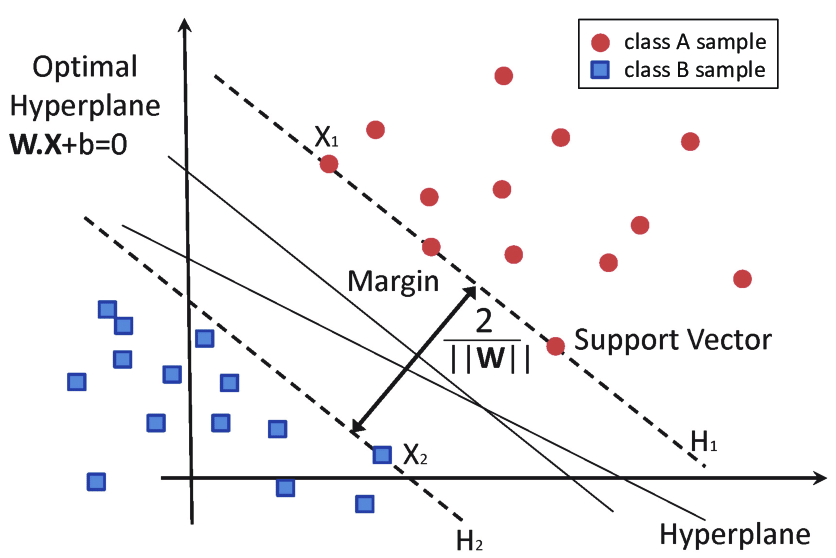

**Use Case**

SVMs are particularly effective in high-dimensional spaces and when the number of dimensions exceeds the number of samples. They are used in a variety of applications including:
- **Text categorization**: Classifying documents into categories such as spam vs. non-spam email.
- **Image classification**: Identifying objects within images.
- **Bioinformatics**: Classifying proteins or genes.
- **Handwriting recognition**: Recognizing handwritten digits or characters.



**Concept**

Given a set of training data points $\{(x_i, y_i)\}$, where $x_i \in \mathbb{R}^n$ and $y_i \in \{-1, 1\}$, the goal is to find the hyperplane defined by $w \cdot x + b = 0$ that maximally separates the classes.


## **Linear SVM**

**Mathematical Formulation**

The goal of a Linear SVM is to find the optimal hyperplane that separates two classes of data points with the maximum margin. Here are the mathematical details:

1. **Given**:
   - A set of training data points $\{(x_i, y_i)\}_{i=1}^N$, where $x_i \in \mathbb{R}^n$ and $y_i \in \{-1, 1\}$.

2. **Hyperplane Equation**:
   - The hyperplane is defined by the equation $w \cdot x + b = 0$, where $w$ is the weight vector and $b$ is the bias term.

3. **Optimization Objective**:
   - The objective is to maximize the margin between the two classes. This is equivalent to minimizing $\frac{1}{2} \|w\|^2$, subject to the constraint that all data points are correctly classified with a margin of at least 1.

4. **Constraints**:
   - For each data point $(x_i, y_i)$, the constraint is:
   $$ y_i (w \cdot x_i + b) \geq 1 \quad \forall i $$

5. **Primal Form of the Optimization Problem**:
   - Minimize the following objective function:
     $$ \min_{w, b} \frac{1}{2} \|w\|^2 $$
   - Subject to:
     $$ y_i (w \cdot x_i + b) \geq 1 \quad \forall i $$



**Introducing Slack Variables for Soft Margin**

To allow for some misclassification and make the SVM more robust to noise, slack variables $\xi_i$ are introduced:

1. **Objective with Slack Variables**:
   - Minimize:
     $$ \min_{w, b, \xi} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^N \xi_i $$
   - Subject to:
     $$ y_i (w \cdot x_i + b) \geq 1 - \xi_i \quad \forall i $$
     $$ \xi_i \geq 0 \quad \forall i $$

2. **Regularization Parameter**:
   - $C$ is a regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error.


**Dual Formulation**

The dual problem transforms the problem into a quadratic programming problem with a simpler set of constraints.

The primal problem (see Introducing Slack Variables for Soft Margin) can be transformed into its dual form, which is often easier to solve:

1. **Lagrangian**:
   - The Lagrangian for the primal problem is:
     $$ L(w, b, \xi, \alpha, \beta) = \frac{1}{2} \|w\|^2 + C \sum_{i=1}^N \xi_i - \sum_{i=1}^N \alpha_i [y_i (w \cdot x_i + b) - 1 + \xi_i] - \sum_{i=1}^N \beta_i \xi_i $$
   - Where $\alpha_i \geq 0$ and $\beta_i \geq 0$ are Lagrange multipliers.

2. **Dual Problem**:
   - Maximize:
     $$ \max_{\alpha} \sum_{i=1}^N \alpha_i - \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j (x_i \cdot x_j) $$
   - Subject to:
     $$ \sum_{i=1}^N \alpha_i y_i = 0 $$
     $$ 0 \leq \alpha_i \leq C \quad \forall i $$


**Sequential Minimal Optimization (SMO)**

One efficient method to solve the dual problem is the Sequential Minimal Optimization (SMO) algorithm:

1. **Initialize**: Set $\alpha = 0$ and compute the initial error $E_i = f(x_i) - y_i$ for all $i$.
2. **Select**: Choose a pair of $\alpha_i$ and $\alpha_j$ to optimize. This involves:
   - Choosing $\alpha_i$ that violates the KKT conditions the most.
   - Choosing $\alpha_j$ that maximizes the step size for $\alpha_i$.
3. **Compute Bounds**: Calculate the bounds $L$ and $H$ for $\alpha_j$.
4. **Update**: Compute the new values for $\alpha_i$ and $\alpha_j$.
5. **Update Weights**: Update the weight vector $w$ and the bias term $b$.
6. **Repeat**: Iterate over the dataset until the stopping criteria are met (e.g., no significant change in $\alpha$).


In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binary classification for simplicity (setosa vs. non-setosa)
y = (y == 0).astype(int)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the SVM model using dual formulation
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Plotting (for 2D visualization purposes, we'll use only the first two features)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('SVM Classification Results')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# Plot support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

## **Non-Linear SVM**

When dealing with non-linearly separable data, SVMs use the "kernel trick" to transform the data into a higher-dimensional space where it becomes linearly separable. The kernel function allows the algorithm to operate in the original feature space while implicitly computing the transformation.

**Mathematical Details**

1. **Objective Function**:

   The primal form of the optimization problem for SVM is given by:
   $$
   \min_{w, b, \xi} \left\{ \frac{1}{2} \|w\|^2 + C \sum_{i=1}^N \xi_i \right\}
   $$
   subject to:
   $$
   y_i (w \cdot \phi(x_i) + b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad \forall i
   $$
   where:
   - $w$ is the weight vector
   - $b$ is the bias term
   - $\xi_i$ are slack variables allowing for some misclassification
   - $C$ is the regularization parameter controlling the trade-off between margin maximization and error minimization
   - $\phi(x_i)$ is a feature mapping function

2. **Dual Form**:

   The dual form is derived using Lagrange multipliers and is given by:
   $$
   \max_{\alpha} \left\{ \sum_{i=1}^N \alpha_i - \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j K(x_i, x_j) \right\}
   $$
   subject to:
   $$
   \sum_{i=1}^N \alpha_i y_i = 0, \quad 0 \leq \alpha_i \leq C, \quad \forall i
   $$
   where:
   - $\alpha_i$ are the Lagrange multipliers
   - $K(x_i, x_j)$ is the kernel function defined as $K(x_i, x_j) = \phi(x_i) \cdot \phi(x_j)$

3. **Kernel Functions**:

   Common kernel functions include:
   - **Linear Kernel**: $K(x_i, x_j) = x_i \cdot x_j$
   - **Polynomial Kernel**: $K(x_i, x_j) = (x_i \cdot x_j + 1)^d$
   - **Radial Basis Function (RBF) Kernel**: $K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2)$
   - **Sigmoid Kernel**: $K(x_i, x_j) = \tanh(\kappa x_i \cdot x_j + \theta)$



**Algorithm**

1. **Initialization**:
   - Select a kernel function $K(x_i, x_j)$.
   - Set the regularization parameter $C$.
   
2. **Compute the Kernel Matrix**:
   - Compute the kernel matrix $K$ where each element is $K_{ij} = K(x_i, x_j)$.

3. **Solve the Dual Problem**:
   - Solve the dual optimization problem to find the Lagrange multipliers $\alpha_i$.

4. **Compute the Weight Vector and Bias**:
   - Compute the weight vector $w$ and bias $b$ using:
   $$w = \sum_{i=1}^N \alpha_i y_i \phi(x_i)$$
   $$ b = y_k - \sum_{i=1}^N \alpha_i y_i K(x_i, x_k) \quad \text{for any } \alpha_k > 0$$

5. **Decision Function**:The decision function for predicting a new data point $x$ is given by:
$$
f(x) = \text{sign}\left( \sum_{i=1}^N \alpha_i y_i K(x_i, x) + b \right)
$$

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# For simplicity, we only take the first two classes and first two features
X = X[y != 2, :2]
y = y[y != 2]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the SVM model with RBF kernel
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Plotting the decision boundary
def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title('SVM with RBF Kernel Decision Boundary')
    plt.show()

plot_decision_boundary(X_test, y_test, model)

# **Nearest Neighbors**

Nearest Neighbors is a simple and intuitive machine learning algorithm used for classification and regression that predicts the output for a new data point based on the closest training examples in the feature space.

Nearest Neighbors is particularly useful in cases where:

- **Data is not linearly separable**: It can handle complex decision boundaries.
- **Few assumptions about data distribution**: It is non-parametric and does not assume a specific distribution of the data.
- **Real-time predictions**: It can quickly provide predictions for new data points, especially when the dataset is small to medium-sized.
- **Multiclass classification**: It handles multiple classes effectively.
- **Anomaly detection**: Identifying outliers based on their distance from other data points.
- **Recommendation systems**: Suggesting items similar to a user's past preferences.

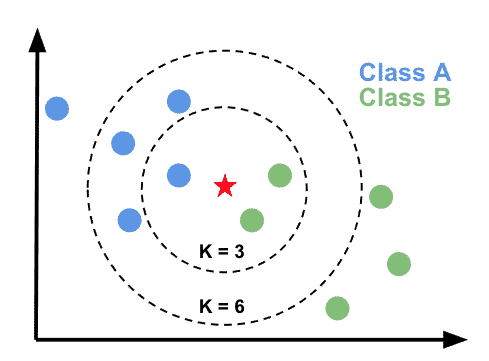

## **KNeighbors Classifier**

**K-Nearest Neighbors (KNN) Classifier Algorithm**

1. **Initialization**:
   - Choose the number of neighbors $k$.
   - Select a distance metric (e.g., Euclidean distance).

2. **Training Phase**:
   - Store all the training data points and their corresponding labels.

3. **Prediction Phase**:
   For a new data point $x_{\text{new}}$:
   1. **Compute Distances**:
      - Calculate the distance between $x_{\text{new}}$ and all training data points using the selected distance metric.
      $$
      d(x_{\text{new}}, x_i) \text{ for all } i
      $$
   2. **Find Nearest Neighbors**:
      - Identify the $k$ training data points that have the smallest distances to $x_{\text{new}}$.
   3. **Voting**:
      - Collect the labels of these $k$ nearest neighbors.
      - Determine the most frequent label (majority vote) among the $k$ nearest neighbors.
   4. **Assign Label**:
      - Assign the majority label to $x_{\text{new}}$.

**Steps in Detail**

1. **Choose $k$**:
   - The value of $k$ is a hyperparameter that determines the number of nearest neighbors to consider for classification.

2. **Distance Metric**:
   - Commonly used distance metrics include:
     - **Euclidean Distance**:
       $$
       d(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}
       $$
     - **Manhattan Distance**:
       $$
       d(x, y) = \sum_{i=1}^n |x_i - y_i|
       $$
     - **Minkowski Distance**:
       $$
       d(x, y) = \left( \sum_{i=1}^n |x_i - y_i|^p \right)^{1/p}
       $$

3. **Algorithm Execution**:
   - For each test point $x_{\text{new}}$, calculate its distance to all training points.
   - Sort the distances and identify the $k$ smallest ones.
   - Determine the labels of the $k$ nearest neighbors.
   - Use majority voting to classify $x_{\text{new}}$.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the KNN model
k = 3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Plotting the decision boundary for visualization (for 2D purposes, use only first two features)
def plot_decision_boundary(X, y, model, k):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title(f'KNN (k={k}) Decision Boundary')
    plt.show()

plot_decision_boundary(X_test, y_test, model, k)

## **KNeighbors Regressor**

**K-Nearest Neighbors (KNN) Regressor Algorithm**


1. **Initialization**:
   - Choose the number of neighbors $k$.
   - Select a distance metric (e.g., Euclidean distance).

2. **Training Phase**:
   - Store all the training data points and their corresponding target values.

3. **Prediction Phase**:
   For a new data point $x_{\text{new}}$:
   1. **Compute Distances**:
      - Calculate the distance between $x_{\text{new}}$ and all training data points using the selected distance metric.
      $$
      d(x_{\text{new}}, x_i) \text{ for all } i
      $$
   2. **Find Nearest Neighbors**:
      - Identify the $k$ training data points that have the smallest distances to $x_{\text{new}}$.
   3. **Average of Neighbors**:
      - Collect the target values of these $k$ nearest neighbors.
      - Compute the average of these target values to predict the target for $x_{\text{new}}$.
   4. **Assign Target Value**:
      - Assign the average target value to $x_{\text{new}}$.

### Steps in Detail

1. **Choose $k$**:
   - The value of $k$ is a hyperparameter that determines the number of nearest neighbors to consider for regression.

2. **Distance Metric**:
   - Commonly used distance metrics include:
     - **Euclidean Distance**:
       $$
       d(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}
       $$
     - **Manhattan Distance**:
       $$
       d(x, y) = \sum_{i=1}^n |x_i - y_i|
       $$
     - **Minkowski Distance**:
       $$
       d(x, y) = \left( \sum_{i=1}^n |x_i - y_i|^p \right)^{1/p}
       $$

3. **Algorithm Execution**:
   - For each test point $x_{\text{new}}$, calculate its distance to all training points.
   - Sort the distances and identify the $k$ smallest ones.
   - Determine the target values of the $k$ nearest neighbors.
   - Compute the average of these target values to predict the target for $x_{\text{new}}$.


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
boston = datasets.load_boston()
X = boston.data
y = boston.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the KNN regressor model
k = 5
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plotting the predictions vs actual values
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'KNN Regressor (k={k}) Predictions vs Actual Values')
plt.show()

# **Decision Trees**

Decision Trees are non-parametric supervised learning models used for both classification and regression tasks. They recursively partition the data into subsets based on features that best separate the target variable, creating a tree-like structure where each internal node represents a decision based on a feature, each branch represents an outcome of the decision, and each leaf node represents a class label (in classification) or a predicted value (in regression).

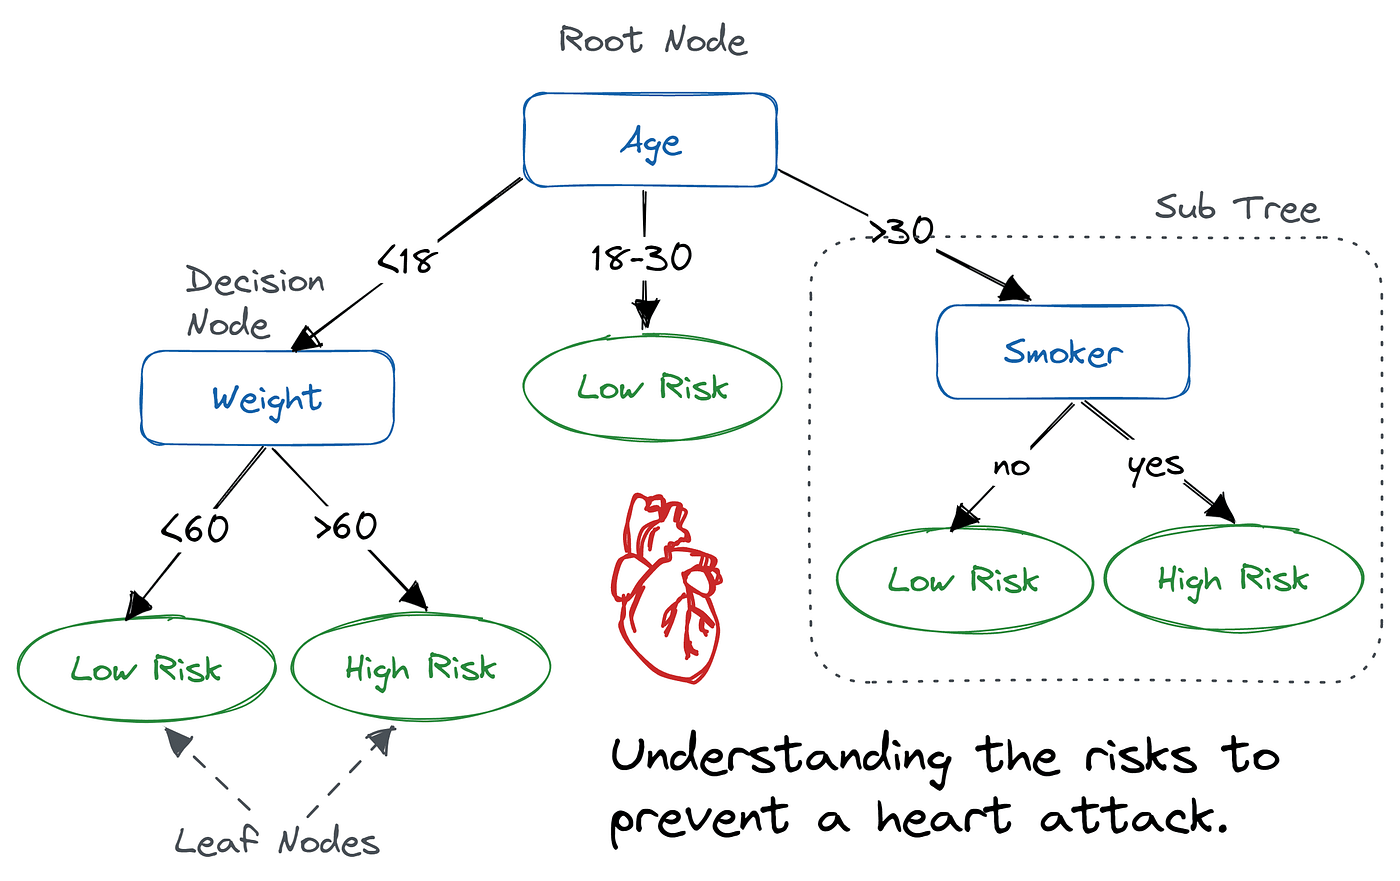

## **DecisionTreeClassifier Algorithm**

**DecisionTreeClassifier Algorithm**

1. **Initialization**:
   - Choose splitting criteria (e.g., Gini impurity for classification) and stopping criteria (e.g., maximum depth of the tree, minimum samples per leaf).

2. **Recursive Tree Building**:
   - **Splitting Nodes**:
     - For each node, select the feature that best splits the data based on the chosen criteria (e.g., Gini impurity or information gain).
     - Partition the data into subsets based on the chosen feature threshold.
   - **Stopping Criteria**:
     - If the stopping criteria are met (e.g., maximum depth reached, no further information gain), declare the node as a leaf and assign it the majority class label (for classification).
   - **Recursive Process**:
     - Recursively apply the splitting process to each subset until all nodes are declared as leaves.

3. **Prediction**:
   - For a new data point, traverse the decision tree from the root to a leaf node based on the feature values of the data point.
   - Assign the majority class label of the leaf node as the predicted class.


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Decision Tree Classifier
model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Plotting the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title('Decision Tree Classifier')
plt.show()

## **DecisionTreeRegressor**

**DecisionTreeRegressor Algorithm**

1. **Initialization**:
   - Choose splitting criteria (e.g., mean squared error) and stopping criteria (e.g., maximum depth of the tree, minimum samples per leaf).

2. **Recursive Tree Building**:
   - **Splitting Nodes**:
     - For each node, select the feature and threshold that minimize the mean squared error between predicted and actual values.
     - Partition the data into subsets based on the chosen feature threshold.
   - **Stopping Criteria**:
     - If the stopping criteria are met (e.g., maximum depth reached, no further reduction in mean squared error), declare the node as a leaf and assign it the mean of target values in the leaf.
   - **Recursive Process**:
     - Recursively apply the splitting process to each subset until all nodes are declared as leaves.

3. **Prediction**:
   - For a new data point, traverse the decision tree from the root to a leaf node based on the feature values of the data point.
   - Assign the mean of target values in the leaf node as

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
boston = datasets.load_boston()
X = boston.data
y = boston.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Decision Tree Regressor
model = DecisionTreeRegressor(criterion='mse', max_depth=None, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plotting the predictions vs actual values
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regressor Predictions vs Actual Values')
plt.show()

# **Ensemble Methods**

Ensemble Methods refer to machine learning techniques that combine multiple models (often called "base learners") to produce better predictive performance than could be obtained from any of the constituent models alone. These methods typically leverage the diversity among individual models to achieve superior results in terms of accuracy, robustness, and generalizability.


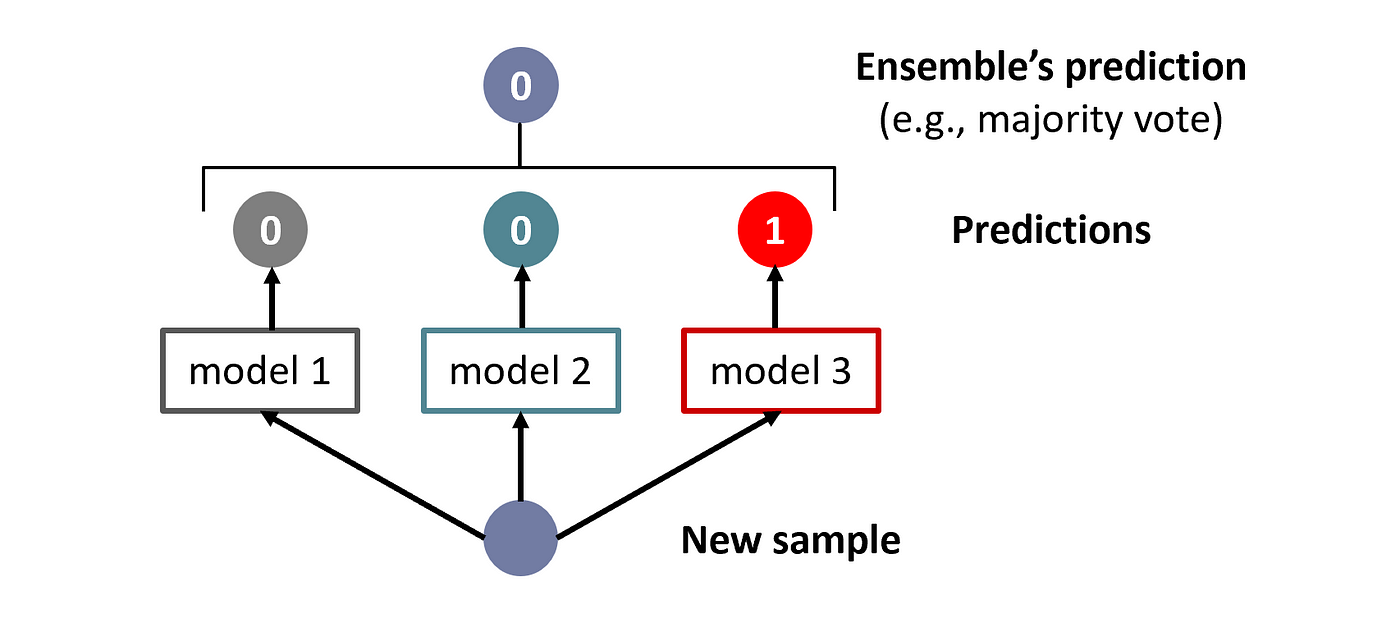

## **Random Forest**

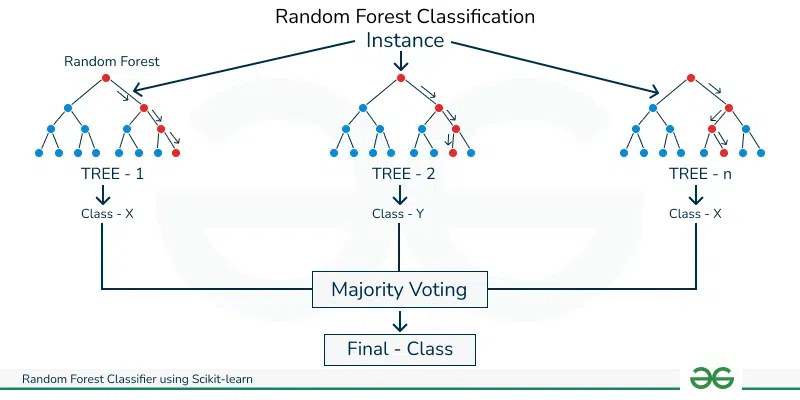

**Definition**

**Random Forest** is an ensemble learning method that constructs a collection of decision trees during training and outputs the mode (for classification) or average prediction (for regression) of the individual trees as its final prediction.


**Algorithm**

1. **Initialization**:
   - Choose the number of trees (ensemble size) to be built.
   - Specify the maximum depth of each tree (optional).
   - Decide the number of features to consider for each split (often the square root of the total number of features).

2. **Bootstrapping**:
   - Randomly select samples with replacement from the training data (bootstrap samples) to train each tree.

3. **Building Trees**:
   - For each tree:
     - **Randomly select a subset of features** # Bagging.
     - Construct a decision tree based on these features and the bootstrap samples.
     - Split each node using the feature that provides the best split according to a chosen criterion.

4. **Aggregation**:
   - Aggregate the predictions from all trees:
     - For classification, use majority voting to determine the final predicted class.
     - For regression, compute the average of all tree predictions.



In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
boston = datasets.load_boston()
X = boston.data
y = boston.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


##**AdaBoost**

AdaBoost (Adaptive Boosting) is an ensemble learning technique that aims to improve the performance of weak learners (often decision trees) by combining them into a strong learner. It focuses on sequentially training models and adjusting weights of instances based on their classification errors. AdaBoost assigns weights to data points and adjusts them at each iteration to emphasize the misclassified samples, allowing subsequent weak learners to focus more on difficult cases.

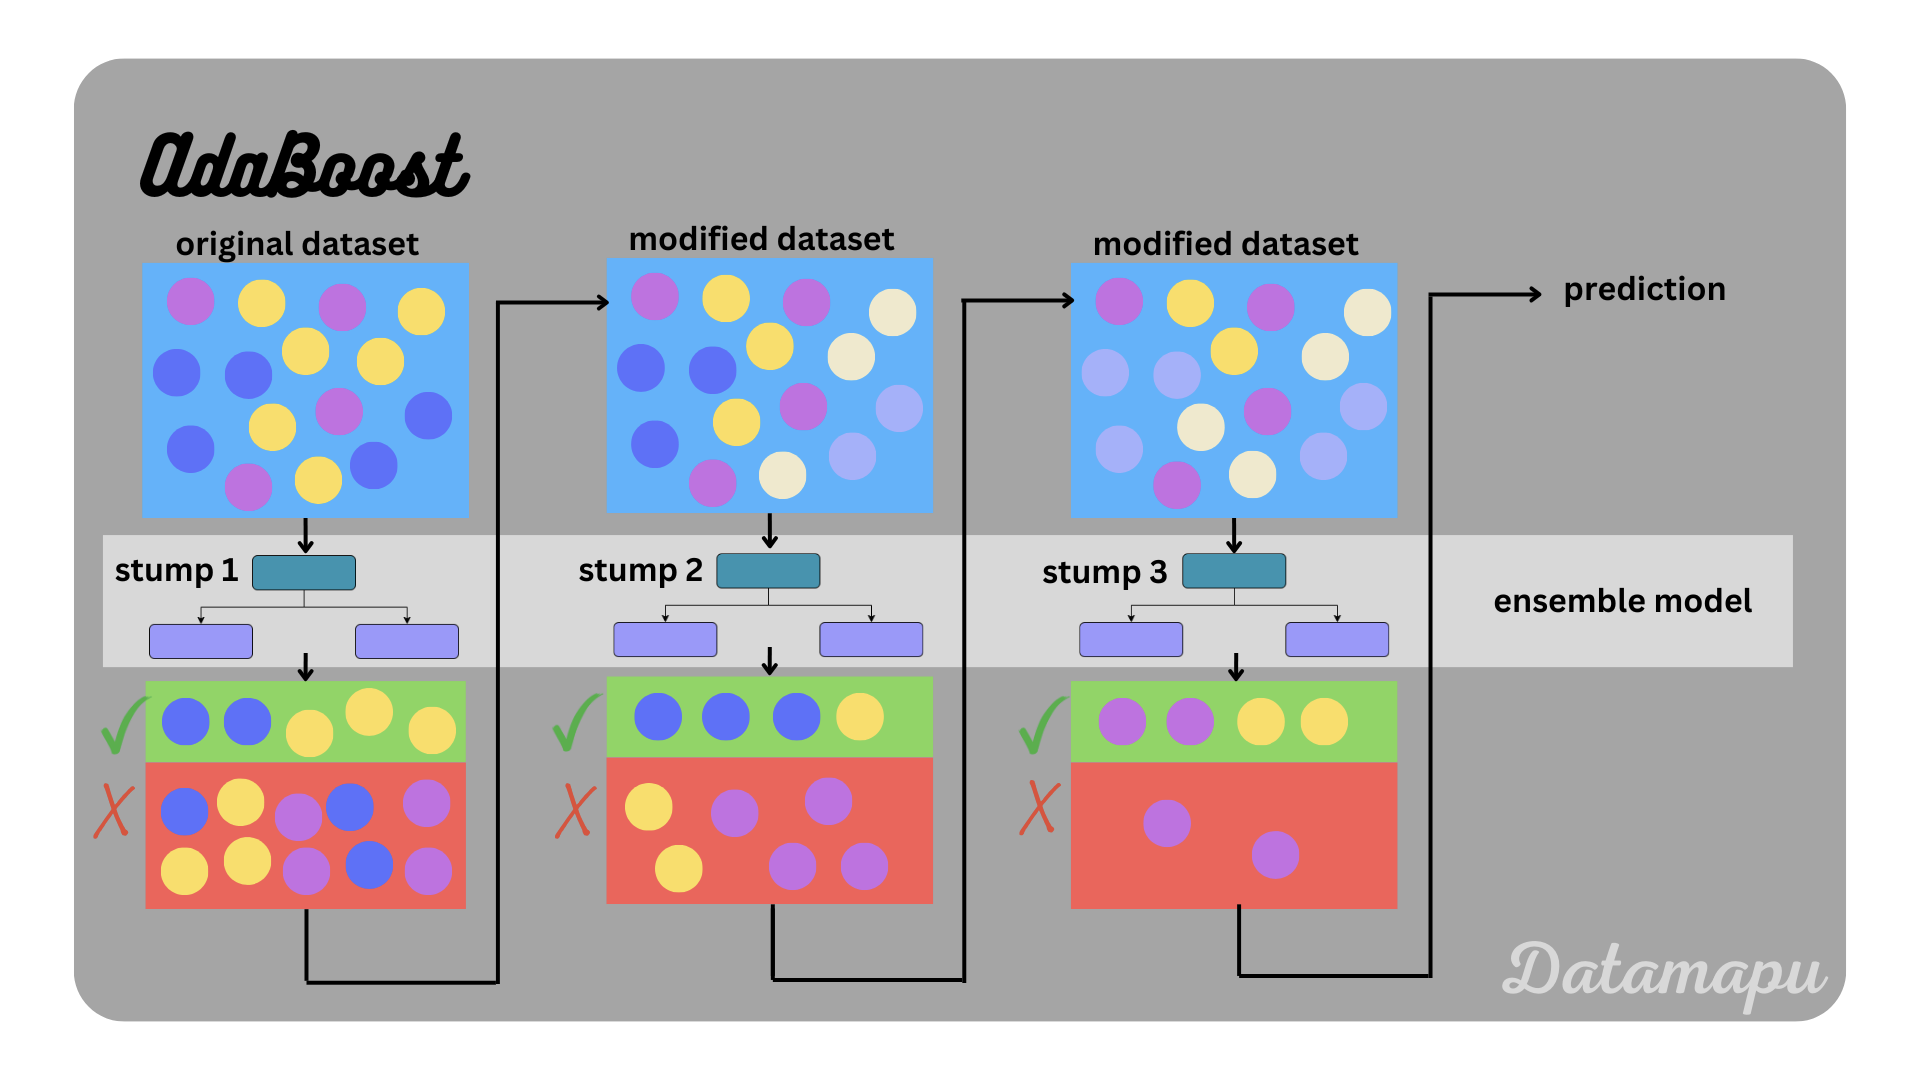

**AdaBoost Algorithm with Mathematical Details**


Let's denote:
- $ D_t $: Distribution of weights over the training examples at iteration $ t $.
- $ h_t(x) $: Weak learner (hypothesis) at iteration $ t $.
- $ \alpha_t $: Weight of the weak learner $ h_t(x) $ in the final model.

**Initialization**:
1. Initialize the weights uniformly over the training examples:
   $$
   D_1(i) = \frac{1}{N}, \quad i = 1, 2, \ldots, N
   $$
   where $ N $ is the number of training examples.

**For each iteration $ t = 1, 2, \ldots, T $**:
   
**Step 2.1: Train Weak Learner**:
- Train a weak learner $ h_t(x) $ using the current distribution of weights $ D_t $.

**Step 2.2: Compute Error and Weight of Learner**:
- Compute the weighted error of the weak learner $ h_t(x) $:
   $$
   \epsilon_t = \sum_{i=1}^{N} D_t(i) \cdot \mathbb{1}\{h_t(x_i) \neq y_i\}
   $$
   where $ \mathbb{1}\{\cdot\} $ is the indicator function.
   
- Compute the weight $ \alpha_t $ of the weak learner $ h_t(x) $ in the final model:
   $$
   \alpha_t = \frac{1}{2} \ln\left( \frac{1 - \epsilon_t}{\epsilon_t} \right)
   $$
   Note: $ \epsilon_t $ should be bounded away from 0 and 1 to ensure $ \alpha_t $ is meaningful.

**Step 2.3: Update Distribution of Weights**:
- Update the distribution of weights for the next iteration:
   $$
   D_{t+1}(i) = \frac{D_t(i) \cdot \exp\left(-\alpha_t y_i h_t(x_i)\right)}{Z_t}
   $$
   where $ Z_t $ is a normalization factor (partition function) to ensure $ D_{t+1} $ sums to 1:
   $$
   Z_t = \sum_{i=1}^{N} D_t(i) \cdot \exp\left(-\alpha_t y_i h_t(x_i)\right)
   $$

**Step 3: Construct the Final Model**:
- Combine the weak learners $ h_t(x) $ weighted by $\alpha_t$ to form the final strong classifier:
   $$
   H(x) = \text{sign}\left( \sum_{t=1}^{T} \alpha_t h_t(x) \right)
   $$
   For regression tasks, the final prediction is:
   $$
   H(x) = \sum_{t=1}^{T} \alpha_t h_t(x)
   $$

**Key Points:**

- **Weighted Error**: $ \epsilon_t $ measures the performance of the weak learner $ h_t(x) $ on the weighted training data $ D_t $.
- **Weight Calculation**: $ \alpha_t $ adjusts based on $ \epsilon_t $, assigning higher weights to more accurate weak learners.
- **Distribution Update**: $ D_{t+1} $ is updated to focus more on examples misclassified by $h_t(x)$, promoting learning from difficult examples.
- **Final Model**: The final model $ H(x) $ combines the predictions of all weak learners weighted by $ \alpha_t $, emphasizing the consensus among weak learners.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
boston = datasets.load_boston()
X = boston.data
y = boston.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the AdaBoost Regressor
model = AdaBoostRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

##**Gradient Boosting**

Gradient Boosting is an ensemble learning method that combines multiple weak learners (often decision trees) sequentially to build a strong learner. Unlike AdaBoost, which adjusts weights of instances, Gradient Boosting builds models in a stage-wise fashion, where each new model corrects errors made by the previous ones. It minimizes a loss function (like squared error for regression or logarithmic loss for classification) by adding weak learners using gradient descent-like techniques.

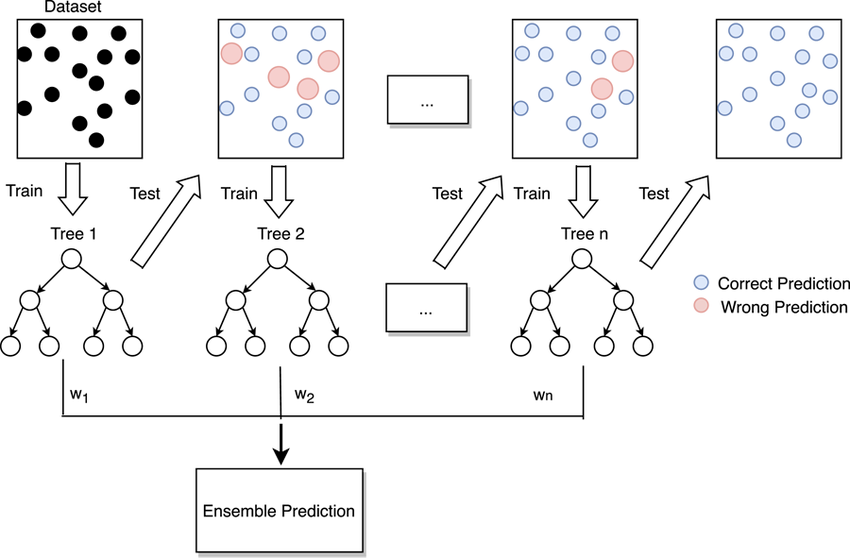


**Gradient Boosting Algorithm with Mathematical Details**

Let's denote:
- $H(x)$: Final boosted model, represented as the sum of weak learners.
- $h_t(x)$: Weak learner (tree) at iteration $t$.
- $\gamma_t$: Learning rate (shrinkage parameter) for the $t$-th weak learner.

**Initialization**:
1. Initialize the boosted model as the constant value:
   $$
   H_0(x) = \arg \min_\gamma \sum_{i=1}^{N} L(y_i, \gamma)
   $$
   where $L$ is the chosen loss function.

**For each iteration $t = 1, 2, \ldots, T$**:

**Step 1: Compute Pseudo-residuals**:
- Compute the pseudo-residuals (negative gradient of the loss function):
   $$
   r_{ti} = - \left[ \frac{\partial L(y_i, H_{t-1}(x_i))}{\partial H_{t-1}(x_i)} \right], \quad i = 1, 2, \ldots, N
   $$

**Step 2: Train Weak Learner**:
- Train a weak learner $h_t(x)$ to fit the pseudo-residuals:
   $$
   h_t(x) = \arg \min_{h} \sum_{i=1}^{N} L(y_i, H_{t-1}(x_i) + \gamma_t h(x_i))
   $$

**Step 3: Update Boosted Model**:
- Update the boosted model $H_t(x)$ by adding the weak learner with a learning rate $\gamma_t$:
   $$
   H_t(x) = H_{t-1}(x) + \gamma_t h_t(x)
   $$

**Final Model**:
- The final boosted model $H(x)$ is the sum of all weak learners weighted by their learning rates:
   $$
   H(x) = H_0(x) + \sum_{t=1}^{T} \gamma_t h_t(x)
   $$

**Key Features and Advantages**

- **Sequential Learning**: Builds models sequentially, each correcting errors made by previous models.
- **Gradient Descent Optimization**: Optimizes a differentiable loss function using gradient descent techniques.
- **Shrinkage**: Introduces a shrinkage parameter $\gamma_t$ to control the contribution of each weak learner.
- **Flexibility**: Can be used with various weak learners and different loss functions (e.g., regression, classification).

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
boston = datasets.load_boston()
X = boston.data
y = boston.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


## **Voting**

Voting (or Voting Ensemble) is an ensemble learning method that combines multiple machine learning models (classifiers or regressors) and uses a majority vote (for classification) or averaging (for regression) to predict the final output. It aggregates the predictions of multiple base models to improve generalizability and performance.


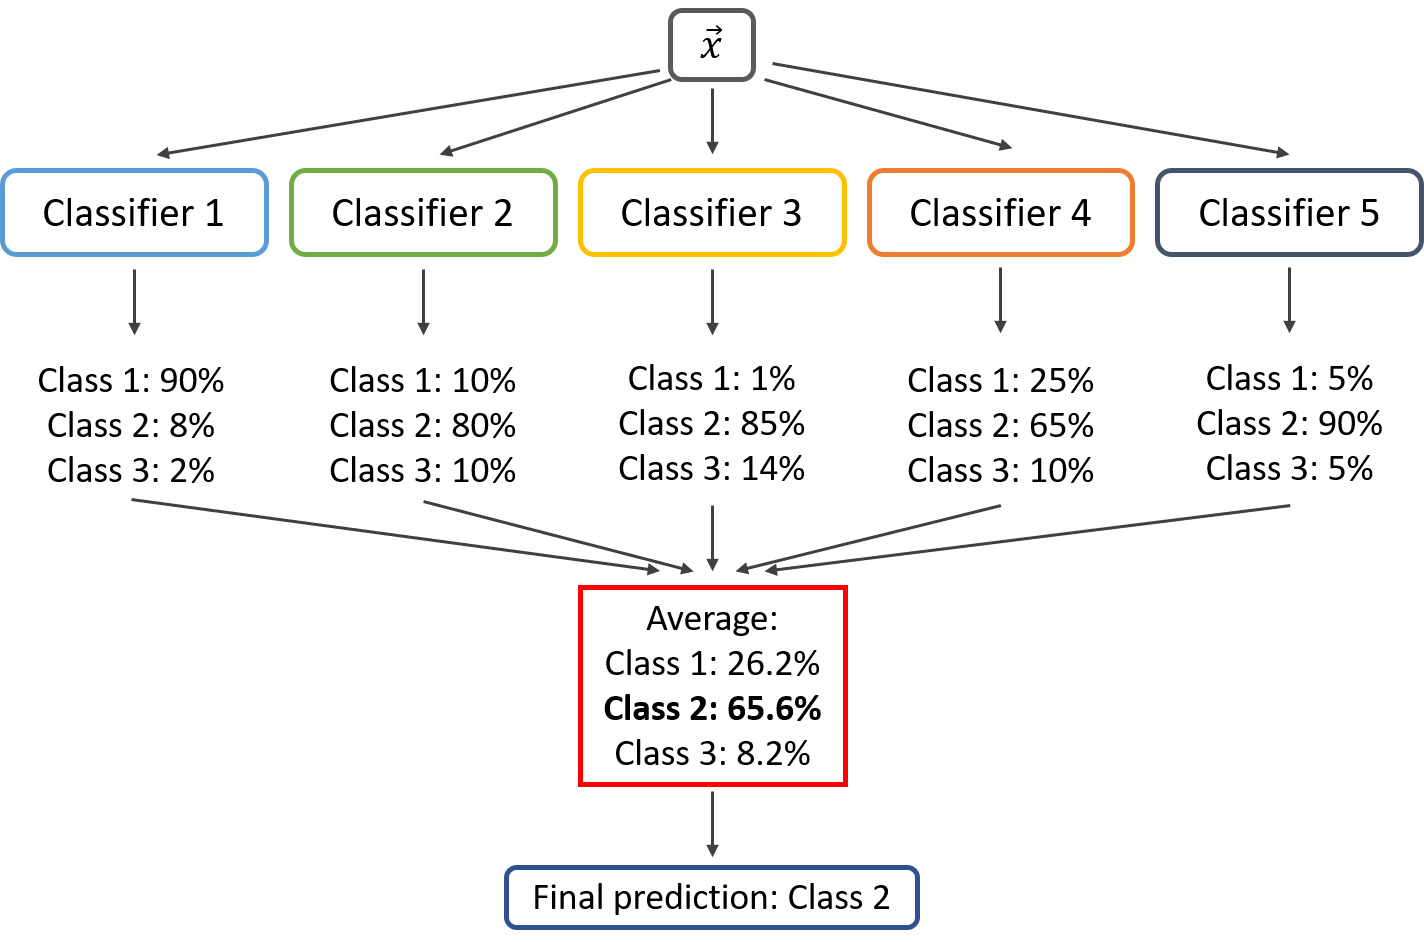

**Voting Algorithm**

Let's denote:
- $ M $: Number of base models (classifiers or regressors).
- $ h_i(x) $: Base model $ i $ which predicts the output for input $ x $.


1. **Initialization**:
   - Choose multiple base classifiers $ h_i(x) $, $ i = 1, 2, \ldots, M $.

2. **Training**:
   - Train each base classifier on the training data independently.

3. **Prediction**:
   - For classification:
     - Each base classifier $ h_i(x) $ predicts a class label for input $ x $.
     - The final prediction is determined by majority voting among all base classifiers.
     $$
     H(x) = \text{mode}\left(h_1(x), h_2(x), \ldots, h_M(x)\right)
     $$
     where $ \text{mode} $ denotes the most frequent prediction.
   
   - For regression:
     - Each base regressor $ h_i(x) $ predicts a numerical value for input $ x $.
     - The final prediction is the average of all base regressors.
     $$
     H(x) = \frac{1}{M} \sum_{i=1}^{M} h_i(x)
     $$
**Key Features and Advantages**

- **Ensemble Learning**: Combines multiple models to improve predictive performance.
- **Diversity**: Uses models with different algorithms or trained on different subsets of data.
- **Robustness**: Reduces overfitting and improves generalization.
- **Versatility**: Can be applied to both classification and regression problems.


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base classifiers
clf1 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = LogisticRegression(max_iter=1000, random_state=42)

# Initialize Voting Classifier
model = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('lr', clf3)], voting='hard')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
boston = datasets.load_boston()
X = boston.data
y = boston.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base regressors
reg1 = LinearRegression()
reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
reg3 = KNeighborsRegressor(n_neighbors=5)

# Initialize Voting Regressor
model = VotingRegressor(estimators=[('lr', reg1), ('dt', reg2), ('knn', reg3)])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

## **Bagging**

Bagging (Bootstrap Aggregating) is an ensemble learning method that involves training multiple instances of a base model (often decision trees) on different subsets of the training data and then combining their predictions. It aims to reduce variance and improve the stability and accuracy of machine learning models.

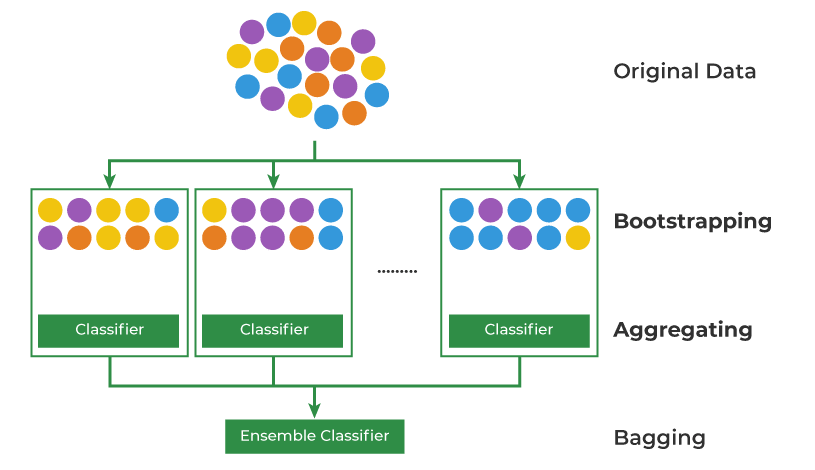

**Bagging Algorithm**

Let's denote:
- $ M $: Number of base models (classifiers or regressors).
- $ h_i(x) $: Base model $ i $ which predicts the output for input $ x $.

1. **Initialization**:
   - Choose a base classifier $ h(x) $.

2. **Training**:
   - For each base model $ i = 1, 2, \ldots, M $:
     - Sample a bootstrap dataset $ D_i $ by randomly selecting samples with replacement from the original training data.
     - Train the base classifier $ h_i(x) $ on dataset $ D_i $.

3. **Prediction**:
   - For classification:
     - Each base classifier $ h_i(x) $ predicts a class label for input $ x $.
     - The final prediction is determined by majority voting among all base classifiers.
     $$
     H(x) = \text{mode}\left(h_1(x), h_2(x), \ldots, h_M(x)\right)
     $$
     where $ \text{mode} $ denotes the most frequent prediction.
   
   - For regression:
     - Each base regressor $ h_i(x) $ predicts a numerical value for input $ x $.
     - The final prediction is the average of all base regressors.
     $$
     H(x) = \frac{1}{M} \sum_{i=1}^{M} h_i(x)
     $$

**Key Features and Advantages**

- **Bootstrap Sampling**: Uses random sampling with replacement to create diverse training datasets.
- **Reduced Variance**: Aggregates predictions from multiple models to reduce overfitting and variance.
- **Robustness**: Improves model stability and generalization.
- **Scalability**: Parallelizable training process suitable for large datasets.


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base classifier
base_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Initialize Bagging Classifier
model = BaggingClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
boston = datasets.load_boston()
X = boston.data
y = boston.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base regressor
base_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)

# Initialize Bagging Regressor
model = BaggingRegressor(base_estimator=base_regressor, n_estimators=50, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


## **Stacking**


**Stacking** (Stacked Generalization) is an ensemble learning technique that combines multiple base models using a meta-model (or blender) to make predictions. It aims to improve predictive performance by learning how to best combine the predictions of its base models.


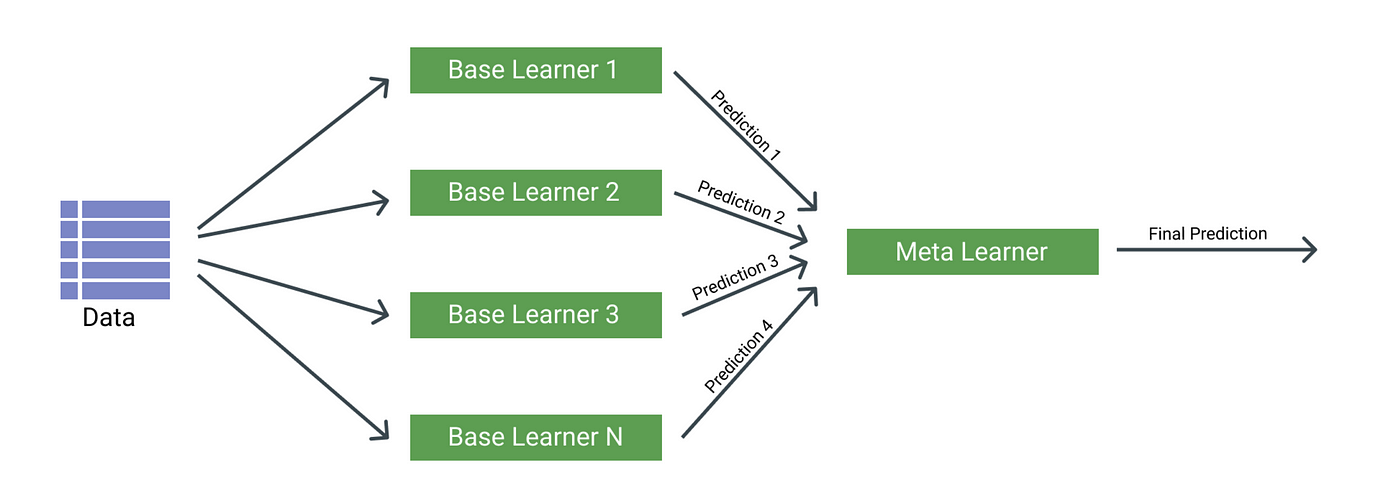

**Stacking Algorithm**

Let's denote:
- $ M $: Number of base models (classifiers or regressors).
- $ h_i(x) $: Base model $ i $ which predicts the output for input $ x $.
- $ g(x) $: Meta-model (blender) which combines predictions of base models.


1. **Initialization**:
   - Choose multiple base classifiers or regressors $ h_i(x) $.
   - Choose a meta-classifier $g(x) $ (e.g., logistic regression, decision tree).

2. **Training**:
   - Train each base classifier or regressor $ h_i(x) $ on the entire training data.

3. **Generate Predictions**:
   - For each base classifier or regressor $ h_i(x) $, generate predictions on the training data.

4. **Construct Meta-Features**:
   - Combine the predictions of all base classifiers or regressor into a new feature matrix (meta-features).
   - This forms a new dataset where each instance has as many features as there are base models, with each feature being the prediction of one base model.

5. **Train Meta-model**:
   - Train the meta-model $ g(x) $ using the meta-features as input and the true labels as output.
   $$
   g(\text{meta-features}) = \text{predictions}
   $$

**Key Features and Advantages**

- **Model Combination**: Integrates diverse base models to exploit their strengths.
- **Improves Generalization**: Reduces overfitting by learning how to best combine model predictions.
- **Flexibility**: Can use different types of base models and meta-models based on the problem.
- **Performance**: Often achieves better performance than individual models or simple ensembles.


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base classifiers
base_classifiers = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

# Initialize Stacking Classifier with a meta-classifier
model = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression(max_iter=1000, random_state=42))

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
boston = datasets.load_boston()
X = boston.data
y = boston.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base regressors
base_regressors = [
    ('knn', KNeighborsRegressor(n_neighbors=5)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
]

# Initialize Stacking Regressor with a meta-regressor
model = StackingRegressor(estimators=base_regressors, final_estimator=LinearRegression())

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

## **Extra Trees**

Extra Trees, short for Extremely Randomized Trees, is an ensemble learning method that builds multiple decision trees using random subsets of the features and splits nodes using random thresholds. It aims to further reduce variance compared to traditional decision trees by introducing additional randomness in the tree-building process.

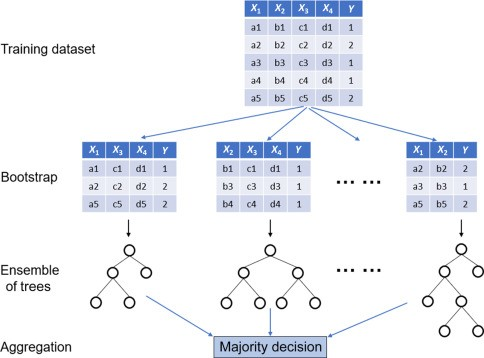

**Extra Trees Algorithm**

Let's denote:
- $ M $: Number of decision trees (estimators).
- $ h_i(x) $: Decision tree $ i $ which predicts the output for input $ x $.


1. **Initialization**:
   - Choose the number of decision trees $ M $.
   - Randomly sample subsets of features for each decision tree.

2. **Training**:
   - For each decision tree $ i = 1, 2, \ldots, M $:
     - Randomly select subsets of samples from the training data (bootstrap sampling).
     - Randomly select subsets of features to consider for each split.
     - Construct the decision tree using these random samples and features.

3. **Prediction**:
   - For classification:
     - Each decision tree $ h_i(x) $ predicts a class label for input $ x $.
     - The final prediction is determined by majority voting among all decision trees.
     $$
     H(x) = \text{mode}\left(h_1(x), h_2(x), \ldots, h_M(x)\right)
     $$
     where $ \text{mode} $ denotes the most frequent prediction.
   
   - For regression:
     - Each decision tree $ h_i(x) $ predicts a numerical value for input $ x $.
     - The final prediction is the average of all decision trees.
     $$
     H(x) = \frac{1}{M} \sum_{i=1}^{M} h_i(x)
     $$

**Key Features and Advantages**

- **Randomness**: Introduces additional randomness in feature selection and threshold determination, reducing overfitting.
- **Bias-Variance Tradeoff**: Decreases variance compared to traditional decision trees at the cost of a slight increase in bias.
- **Efficiency**: Parallelizable training process suitable for large datasets.
- **Feature Importance**: Provides insight into feature importance based on how often they are used in the trees.


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Extra Trees Classifier
model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
boston = datasets.load_boston()
X = boston.data
y = boston.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Extra Trees Regressor
model = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

## **HistGradientBoosting**

Histogram-Based Gradient Boosting is a variant of gradient boosting machines that uses histograms to discretize continuous features and efficiently compute the best splits during the tree-building process. It combines the principles of gradient boosting with histogram approximation to improve training speed and scalability.

**HistGradientBoosting Algorithm**

Let's denote:
- $ M $: Number of boosting stages (iterations).
- $ h_m(x) $: Decision function at stage \( m \), predicting the output for input $ x $.


1. **Initialization**:
   - Choose the number of boosting stages $M$.
   - Initialize the model with a loss function, learning rate, and other hyperparameters.

2. **Training**:
   - For each boosting stage $ m = 1, 2, \ldots, M $:
     - Compute the pseudo-residuals based on the current model predictions and the true labels.
     - Construct a histogram of the training data to efficiently find optimal split points for each feature.
     - Fit a decision tree to predict the pseudo-residuals, using the histogram bins as potential split points.
     - Update the model by adding the tree's predictions scaled by a learning rate to minimize the overall loss function.

3. **Prediction**:
   - Combine the predictions of all trees in the ensemble to obtain the final prediction.
   $$
   H(x) = \sum_{m=1}^{M} h_m(x)
   $$

**Key Features and Advantages**

- **Histogram Approximation**: Uses histograms to discretize continuous features, speeding up the split-finding process.
- **Gradient Boosting**: Iteratively improves the model by fitting new trees to the pseudo-residuals of the previous model.
- **Scalability**: Efficiently handles large datasets and high-dimensional feature spaces.
- **Regularization**: Includes regularization techniques to prevent overfitting.


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting  # Enable HistGradientBoosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize HistGradientBoosting Classifier
model = HistGradientBoostingClassifier(loss='categorical_crossentropy', learning_rate=0.1, max_iter=100)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting  # Enable HistGradientBoosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
boston = datasets.load_boston()
X = boston.data
y = boston.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize HistGradientBoosting Regressor
model = HistGradientBoostingRegressor(loss='least_squares', learning_rate=0.1, max_iter=100)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


# **Gaussian Processes**

**Gaussian Processes** are a powerful probabilistic model used for regression and classification tasks. They define distributions over functions, allowing us to infer likely functions that explain observed data and make predictions at new points. GPs are characterized by their mean function (typically assumed to be zero) and covariance function (kernel), which specifies the relationships between points in the input space.


**Gaussian Processes Algorithm**

Let's denote:
- $ X = \{x_1, x_2, \ldots, x_n\} $: Input training data points.
- $ y = \{y_1, y_2, \ldots, y_n\} $: Corresponding target values.
- $ f(x) $: Function to be modeled by the Gaussian Process.

**Gaussian Process Regression Algorithm**

1. **Initialization**:
   - Choose a kernel function $ k(x, x') $, which specifies the covariance between points $ x $ and $ x' $.
   - Specify a mean function $ \mu(x) $, often assumed to be zero for simplicity.

2. **Training**:
   - Compute the covariance matrix $ K = \{ k(x_i, x_j) \}_{i,j=1}^n $, where $ k(x_i, x_j) $ is the kernel function evaluated at training data points.
   - Add a small diagonal noise term $ \sigma^2 I $ to $ K $ to ensure numerical stability and model flexibility.
   - Invert $ K + \sigma^2 I $ to obtain $ (K + \sigma^2 I)^{-1} $, which is used to compute predictions.

3. **Prediction**:
   - For a new input $ x_* $, compute the mean prediction $ \mu_* = k_*^T (K + \sigma^2 I)^{-1} y $, where $ k_* $ is the vector of kernel evaluations between \( x_* \) and all training points.
   - Compute the predictive variance $ \sigma_*^2 = k(x_*, x_*) - k_*^T (K + \sigma^2 I)^{-1} k_* $, which quantifies uncertainty about predictions.

**Gaussian Process Classification Algorithm**

For classification tasks, Gaussian Processes are typically used with a latent Gaussian Process that models a latent function, and then a likelihood function is used to convert this latent function into probabilities for classification. The exact algorithm involves:

1. **Initialization**:
   - Choose a kernel function $ k(x, x') $ and a mean function $ \mu(x) $.

2. **Training**:
   - Compute the covariance matrix $K$ and add a noise term $ \sigma^2 I $ for numerical stability.
   - Compute the posterior distribution over the latent function values given the observed data using Bayes' rule.

3. **Prediction**:
   - For a new input $ x_* $, compute the posterior distribution over the latent function values and then convert it into probabilities using the likelihood function.

**Key Features and Advantages**

- **Flexibility**: GPs can model complex functions and provide uncertainty estimates.
- **Probabilistic Inference**: Provides a full probabilistic treatment of predictions.
- **Kernel Functions**: Can be adapted to different types of data and relationships.
- **Interpretability**: Kernel choice allows encoding of prior knowledge about data.


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
boston = datasets.load_boston()
X = boston.data
y = boston.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the kernel
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))

# Initialize Gaussian Process Regressor
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred, sigma = model.predict(X_test, return_std=True)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the kernel
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))

# Initialize Gaussian Process Classifier
model = GaussianProcessClassifier(kernel=kernel, n_restarts_optimizer=10, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


# **Naive Bayes**

**Naive Bayes** is a family of probabilistic classifiers based on Bayes' theorem with strong independence assumptions between the features. It is simple yet effective in many classification tasks, particularly when the naive assumption of feature independence holds reasonably well.


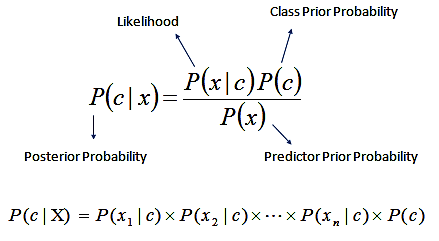

**Naive Bayes Algorithm**

Let's denote:
- $$ X = \{x_1, x_2, \ldots, x_n\} $$: Input training data points with features $ x_i $.
- $ y $: Target variable representing class labels.
- $ P(y) $: Prior probability of class $ y $.
- $ P(x_i \mid y) $: Conditional probability of feature $ x_i $ given class $ y $.

**Naive Bayes Classifier Algorithm**

1. **Initialization**:
   - Compute prior probabilities $ P(y) $ for each class $ y $ in the training data.
   - Compute conditional probabilities $ P(x_i \mid y) $ for each feature $ x_i $ and each class $ y $ in the training data.

2. **Training**:
   - Estimate prior probabilities $ P(y) $ as the proportion of instances in each class $ y $ in the training set.
   - Estimate conditional probabilities $ P(x_i \mid y) $ using maximum likelihood estimation or other smoothing techniques to handle sparse data.

3. **Prediction**:
   - For a new instance $ x^* $:
  - Compute the posterior probability $P(y \mid x^*)$ for each class $ y $ using Bayes' theorem:
  $$
       P(y \mid x^*) = \frac{P(y) \prod_{i=1}^{n} P(x_i^* \mid y)}{P(x^*)}
  $$
     - Classify $ x^* $ as the class $ y $ with the highest posterior probability $ P(y \mid x^*) $.

### Key Features and Advantages

- **Simple and Fast**: Naive Bayes classifiers are easy to implement and efficient for large datasets.
- **Scalability**: Scales well with the number of predictors and data points.
- **Strong Independence Assumption**: Despite its naive assumption, it can perform well in practice if the independence assumption holds or is not severely violated.
- **Interpretability**: Provides transparent probabilistic predictions.


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes Classifier
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Load dataset (example with text data)
newsgroups = datasets.fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
X = newsgroups.data
y = newsgroups.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data using TF-IDF or CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Initialize Multinomial Naive Bayes Classifier
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


# **Discriminant Analysis**

Discriminant analysis refers to a set of supervised learning techniques used for classification and dimensionality reduction tasks. The primary goal of discriminant analysis is to identify and model the characteristics or features that distinguish different classes within the data. It involves calculating and comparing statistical measures such as means, variances, and covariances of the data points belonging to different classes. Linear Discriminant Analysis (LDA) assumes Gaussian distributions and equal covariance matrices across classes to derive linear decision boundaries, whereas Quadratic Discriminant Analysis (QDA) allows for different covariance matrices per class, enabling more flexible decision boundaries. Discriminant analysis is particularly useful in situations where understanding the separability between classes and reducing feature dimensions while preserving class discriminatory information are crucial.

## **Linear Discriminant Analysis (LDA)**

**Definition**

**Linear Discriminant Analysis (LDA)** is a supervised learning algorithm used for dimensionality reduction and classification tasks. It finds linear combinations of features that best separate multiple classes in the data.

**LDA Algorithm**

Let's denote:
- $ X = \{x_1, x_2, \ldots, x_n\} $: Input training data points with $d$-dimensional features $ x_i $.
- $ y $: Target variable representing class labels.


1. **Compute Class Means**:
   - Calculate the mean vector for each class $ \mu_k $, where $ k $ is the class index:$$\mu_k = \frac{1}{n_k} \sum_{i:y_i=k} x_i$$
   - $ n_k $ is the number of samples in class $ k $.

2. **Compute Scatter Matrices**:
   - **Within-class scatter matrix** $ S_W $:$$S_W = \sum_{k=1}^{K} \sum_{i:y_i=k} (x_i - \mu_k)(x_i - \mu_k)^T$$
   - **Between-class scatter matrix** \( S_B \):$$S_B = \sum_{k=1}^{K} n_k (\mu_k - \mu)(\mu_k - \mu)^T$$
   where $ \mu $ is the overall mean across all classes:$$\mu = \frac{1}{n} \sum_{i=1}^{n} x_i, \quad n = \sum_{k=1}^{K} n_k$$

3. **Compute Eigenvectors and Eigenvalues**:
   - Solve the generalized eigenvalue problem $ S_W^{-1} S_B w = \lambda w $ to find the optimal linear discriminants.
   - Select the eigenvectors corresponding to the largest eigenvalues to form the transformation matrix $ W $.

4. **Project Data**:
   - Project the data onto the subspace spanned by the top $ c-1 $ eigenvectors (where $ c $ is the number of classes) to reduce dimensionality or classify new points.



In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LDA
model = LinearDiscriminantAnalysis()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


**Example of Applying LDA Steps with a Real Matrix**

Suppose we have a dataset $X $ with 8 samples and 3 features, and corresponding class labels $ y $:

$$ X = \begin{bmatrix}
5.1 & 3.5 & 1.4 \\
4.9 & 3.0 & 1.4 \\
6.2 & 3.4 & 5.4 \\
5.9 & 3.0 & 5.1 \\
7.0 & 3.2 & 4.7 \\
6.4 & 3.2 & 4.5 \\
6.3 & 2.9 & 5.6 \\
6.8 & 3.0 & 5.5 \\
\end{bmatrix}, \quad y = \begin{bmatrix}
0 \\
0 \\
1 \\
1 \\
1 \\
1 \\
1 \\
1 \\
\end{bmatrix} $$


**Step 1: Compute Class Means**

Calculate the mean vector $ \mu_k $ for each class $k $:

For class $ k = 0 $:
$$ \mu_0 = \frac{1}{2} \left( \begin{bmatrix} 5.1 & 3.5 & 1.4 \end{bmatrix} + \begin{bmatrix} 4.9 & 3.0 & 1.4 \end{bmatrix} \right) = \begin{bmatrix} 5.0 & 3.25 & 1.4 \end{bmatrix} $$

For class $ k = 1 $:
$$ \mu_1 = \frac{1}{6} \left( \begin{bmatrix} 6.2 & 3.4 & 5.4 \end{bmatrix} + \begin{bmatrix} 5.9 & 3.0 & 5.1 \end{bmatrix} + \begin{bmatrix} 7.0 & 3.2 & 4.7 \end{bmatrix} + \begin{bmatrix} 6.4 & 3.2 & 4.5 \end{bmatrix} + \begin{bmatrix} 6.3 & 2.9 & 5.6 \end{bmatrix} + \begin{bmatrix} 6.8 & 3.0 & 5.5 \end{bmatrix} \right) = \begin{bmatrix} 6.38 & 3.15 & 5.05 \end{bmatrix} $$

**Step 2: Compute Scatter Matrices**

Calculate the within-class scatter matrix $ S_W $ and the between-class scatter matrix $ S_B $:

**Within-class scatter matrix $ S_W $**:
$$ S_W = \begin{bmatrix}
S_{W_{11}} & S_{W_{12}} & S_{W_{13}} \\
S_{W_{21}} & S_{W_{22}} & S_{W_{23}} \\
S_{W_{31}} & S_{W_{32}} & S_{W_{33}} \\
\end{bmatrix} $$

Where:
$$ S_{W_{ij}} = \sum_{k=0}^{1} \sum_{x \in X_k} (x_{ik} - \mu_{ij})(x_{ik} - \mu_{ij})^T $$

Calculate $ S_W $ component by component:

$$ S_{W_{11}} = (5.1 - 5.0)^2 + (4.9 - 5.0)^2 = 0.02 + 0.02 = 0.04 $$

$$ S_{W_{12}} = (3.5 - 3.25)^2 + (3.0 - 3.25)^2 = 0.0625 + 0.0625 = 0.125 $$

$$ S_{W_{13}} = (1.4 - 1.4)^2 + (1.4 - 1.4)^2 = 0 $$

$$ S_{W_{21}} = (6.2 - 6.38)^2 + (5.9 - 6.38)^2 + (7.0 - 6.38)^2 + (6.4 - 6.38)^2 + (6.3 - 6.38)^2 + (6.8 - 6.38)^2 = 0.0324 + 0.1476 + 0.204 + 0.0004 + 0.0164 + 0.1684 = 0.5692 $$

$$ S_{W_{22}} = (3.4 - 3.15)^2 + (3.0 - 3.15)^2 + (3.2 - 3.15)^2 + (3.2 - 3.15)^2 + (2.9 - 3.15)^2 + (3.0 - 3.15)^2 = 0.0625 + 0.0625 + 0.025 + 0.025 + 0.0225 + 0.0225 = 0.22 $$

$$ S_{W_{23}} = (5.4 - 5.05)^2 + (5.1 - 5.05)^2 + (4.7 - 5.05)^2 + (4.5 - 5.05)^2 + (5.6 - 5.05)^2 + (5.5 - 5.05)^2 = 0.2025 + 0.0025 + 0.2025 + 0.3025 + 0.2025 + 0.2025 = 1.115 $$

$$ S_{W_{31}} = 0 $$

$$ S_{W_{32}} = 1.115 $$

$$ S_{W_{33}} = 3.162 $$

**Between-class scatter matrix $ S_B $**:
$$ S_B = \begin{bmatrix}
S_{B_{11}} & S_{B_{12}} & S_{B_{13}} \\
S_{B_{21}} & S_{B_{22}} & S_{B_{23}} \\
S_{B_{31}} & S_{B_{32}} & S_{B_{33}} \\
\end{bmatrix} $$

Where:
$$ S_{B_{ij}} = \sum_{k=0}^{1} n_k (\mu_{kj} - \mu_j)(\mu_{kj} - \mu_j)^T $$

Calculate $$ S_B $$ component by component:

$$ S_{B_{11}} = 2 \times (5.0 - 6.38)^2 = 2 \times (-1.38)^2 = 3.0352 $$

$$ S_{B_{12}} = 2 \times (3.25 - 3.15)^2 = 2 \times 0.01 = 0.02 $$

$$ S_{B_{13}} = 2 \times (1.4 - 5.05)^2 = 2 \times (-3.65)^2 = 26.7225 $$

$$ S_{B_{21}} = 6 \times (6.38 - 6.38)^2 = 0 $$

$$ S_{B_{22}} = 6 \times (3.15 - 3.15)^2 = 0 $$

$$ S_{B_{23}} = 6 \times (5.05 - 5.05)^2 = 0 $$

$$ S_{B_{31}} = 0 $$

$$ S_{B_{32}} = 0 $$

$$ S_{B_{33}} = 0 $$

**Step 3: Compute Eigenvectors and Eigenvalues**

Now, let's compute the eigenvectors and eigenvalues of $$ S_W^{-1} S_B $$ to find the optimal linear discriminants.

This process involves solving the generalized eigenvalue problem:
$ S_W^{-1} S_B w = \lambda w $

Where $ w $ is the eigenvector and $ \lambda $ is the eigenvalue.



## **Quadratic Discriminant Analysis (QDA)**

**Definition**

**Quadratic Discriminant Analysis (QDA)** is another supervised learning algorithm used for classification tasks. Unlike LDA, it assumes that each class has its own covariance matrix, allowing for more complex decision boundaries.

**QDA Algorithm**


1. **Compute Class Means**:
   - Calculate the mean vector for each class $ \mu_k $, similar to LDA.

2. **Compute Scatter Matrices**:
   - **Within-class scatter matrix** $ S_k $ for class $ k $:$$S_k = \sum_{i:y_i=k} (x_i - \mu_k)(x_i - \mu_k)^T$$

3. **Compute Covariance Matrices**:
   - Each class $ k $ has its own covariance matrix $ \Sigma_k $:$$\Sigma_k = \frac{1}{n_k} S_k$$
     where $ n_k $ is the number of samples in class $ k $.

4. **Compute Decision Function**:
   - For a new point $ x^* $:$$\delta_k(x^*) = -\frac{1}{2} \log |\Sigma_k| - \frac{1}{2} (x^* - \mu_k)^T \Sigma_k^{-1} (x^* - \mu_k) + \log P(y=k)$$
   - Classify $ x^* $ as the class $ k $ with the highest discriminant function $ \delta_k(x^*) $.

**Key Features and Advantages**

- **LDA**:
  - Assumes equal covariance matrices across classes, leading to linear decision boundaries.
  - Efficient for high-dimensional data.
  - Useful for dimensionality reduction.

- **QDA**:
  - Allows for different covariance matrices for each class, accommodating more complex decision boundaries.
  - Can capture more intricate relationships between features.



In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize QDA
model = QuadraticDiscriminantAnalysis()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
